# Data Preparation and Exploration

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv('AI ML Internship Training Data.csv')
df.head(n=5)

,Shipment ID,Origin,Destination,Shipment Date,Planned Delivery Date,Actual Delivery Date,Vehicle Type,Distance (km),Weather Conditions,Traffic Conditions,Delayed
0,SHIP000000,Jaipur,Mumbai,2023-04-26,2023-05-01,2023-05-02,Trailer,1603,Rain,Light,Yes
1,SHIP000001,Bangalore,Delhi,2023-02-09,2023-02-13,2023-02-17,Trailer,1237,Storm,Moderate,Yes
2,SHIP000002,Mumbai,Chennai,2023-09-19,2023-09-25,2023-09-25,Truck,1863,Clear,Light,No
3,SHIP000003,Hyderabad,Ahmedabad,2023-04-01,2023-04-05,2023-04-05,Container,1374,Clear,Light,No
4,SHIP000004,Chennai,Kolkata,2023-11-24,2023-11-26,2023-11-28,Container,676,Clear,Heavy,Yes


# Exploratory Data Analysis

In [21]:
# Checking for missing values in the dataset
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)

Vehicle Type    597
dtype: int64


* The dataset has one column, "Vehicle Type," with 597 missing values. This indicates that we need to handle these missing values before proceeding with further analysis and model development. 

* I will fill the missing values in the "Vehicle Type" column with the mode (most frequent value) of that column, as it is a categorical variable.

In [22]:
# Filling missing values in 'Vehicle Type' with the mode
mode_vehicle_type = df['Vehicle Type'].mode()[0]
df['Vehicle Type'].fillna(mode_vehicle_type, inplace=True)

# Checking for missing values again to confirm
missing_values_after = df.isnull().sum()
missing_values_after = missing_values_after[missing_values_after > 0]
print(missing_values_after)

Series([], dtype: int64)


C:\Users\nithi\AppData\Local\Temp\ipykernel_25524\2503109618.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Vehicle Type'].fillna(mode_vehicle_type, inplace=True)


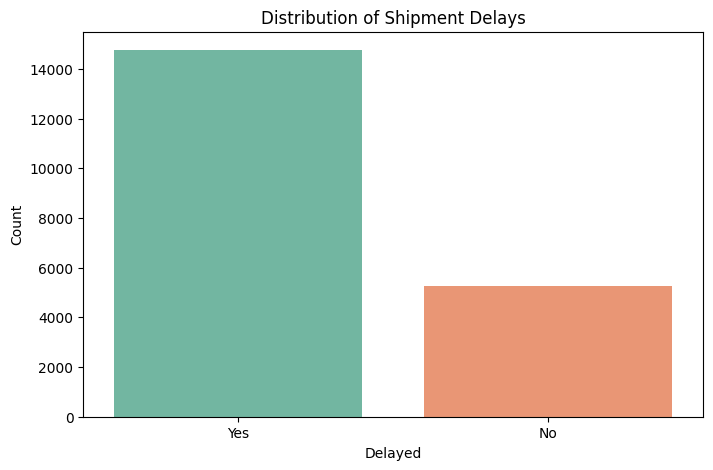

In [23]:
# Analyzing the distribution of the target variable 'Delayed'
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Delayed', palette='Set2')
plt.title('Distribution of Shipment Delays')
plt.xlabel('Delayed')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

The distribution of the "Delayed" variable shows the count of shipments that were delayed versus those that were on time. This visualization helps us understand the balance of our target classes, which is crucial for model training.

Next, I will examine the relationships between the features (such as "Distance (km)," "Weather Conditions," and "Traffic Conditions") and the target variable ("Delayed"). This will help identify which features may be significant predictors of shipment delays. I will create visualizations to explore these relationships. Let's start with the "Distance (km)" feature.

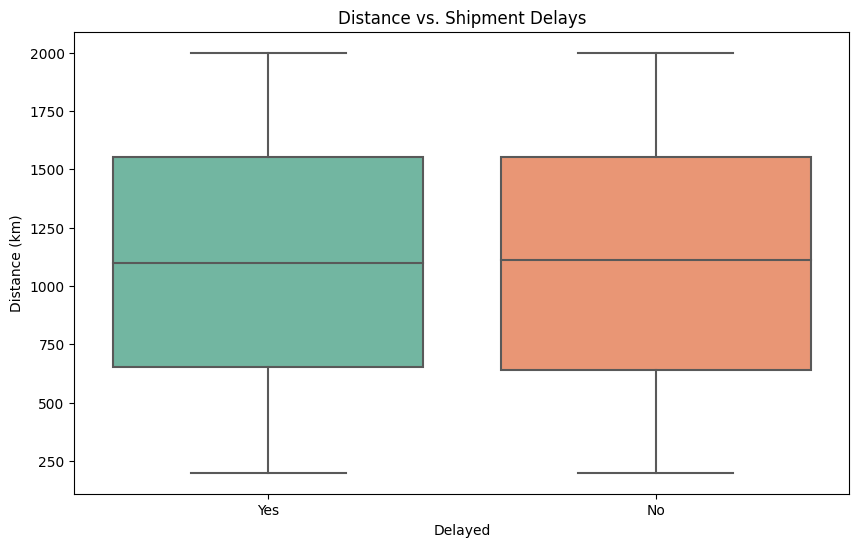

In [24]:
# Visualizing the relationship between 'Distance (km)' and 'Delayed'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Delayed', y='Distance (km)', palette='Set2')
plt.title('Distance vs. Shipment Delays')
plt.xlabel('Delayed')
plt.ylabel('Distance (km)')
plt.xticks(rotation=0)
plt.show()

The boxplot visualizes the relationship between "Distance (km)" and the "Delayed" variable, indicating how distance may influence shipment delays. It appears that delayed shipments tend to have a wider range of distances compared to on-time deliveries.

Next, I will explore the relationships between the "Weather Conditions" and "Traffic Conditions" features with the "Delayed" variable. This will help us understand how these categorical features impact shipment delays. Let's start with the "Weather Conditions."

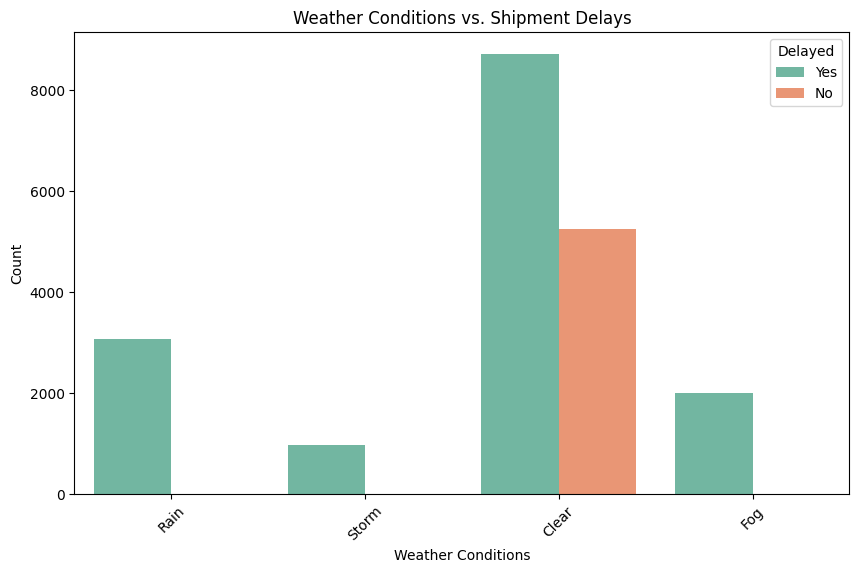

In [25]:
# Visualizing the relationship between 'Weather Conditions' and 'Delayed'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Weather Conditions', hue='Delayed', palette='Set2')
plt.title('Weather Conditions vs. Shipment Delays')
plt.xlabel('Weather Conditions')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Delayed')
plt.show()

The countplot visualizes the relationship between "Weather Conditions" and the "Delayed" variable, indicating how different weather conditions affect shipment delays. It appears that certain weather conditions, such as "Storm," are associated with a higher number of delayed shipments.

Next, I will explore the "Traffic Conditions" feature in relation to the "Delayed" variable to further understand its impact on shipment delays. Let's proceed with that analysis.

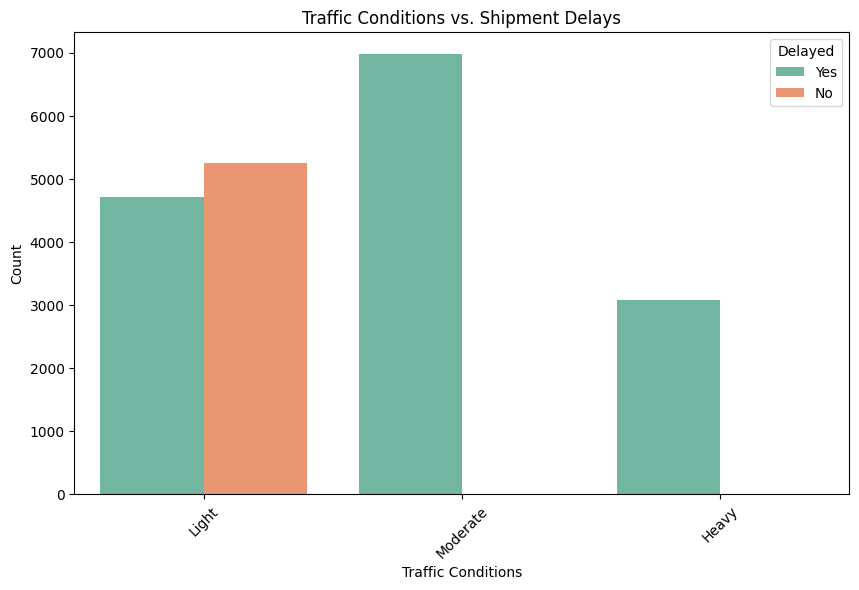

In [26]:
# Visualizing the relationship between 'Traffic Conditions' and 'Delayed'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Traffic Conditions', hue='Delayed', palette='Set2')
plt.title('Traffic Conditions vs. Shipment Delays')
plt.xlabel('Traffic Conditions')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Delayed')
plt.show()

The countplot visualizing the relationship between "Traffic Conditions" and the "Delayed" variable indicates that heavier traffic conditions are associated with a higher number of delayed shipments. This suggests that both weather and traffic conditions are significant factors influencing shipment delays.

In [27]:
df = df.dropna(subset=['Delayed'])

# Data Modelling

In [28]:
# Preparing the data for modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encoding categorical variables
label_encoder = LabelEncoder()
encoded_columns = ['Origin', 'Destination', 'Vehicle Type', 'Weather Conditions', 'Traffic Conditions']
for col in encoded_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Encoding the target variable
# 'Delayed' is 'Yes' or 'No', we will convert it to 1 and 0
df['Delayed'] = df['Delayed'].map({'Yes': 1, 'No': 0})

# Splitting the dataset into features and target variable
X = df.drop(columns=['Shipment ID', 'Delayed', 'Shipment Date', 'Planned Delivery Date', 'Actual Delivery Date'])
Y = df['Delayed']

# Splitting the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Displaying the shapes of the training and testing sets
print('Training set shape:', X_train.shape)
print('Testing set shape:', X_test.shape)

Training set shape: (16000, 6)
Testing set shape: (4000, 6)


The dataset has been successfully prepared for modeling, with the training set containing 16,000 samples and the testing set containing 4,000 samples. The categorical variables have been encoded, and the target variable "Delayed" has been converted to a binary format.

Next, I will build classification models using Logistic Regression and Random Forest. After training these models, I will evaluate their performance using accuracy, precision, recall, and F1 score.

In [29]:
# Importing necessary libraries for modeling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initializing the Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000)

# Training the Logistic Regression model
logistic_model.fit(X_train, Y_train)

# Making predictions on the test set
logistic_predictions = logistic_model.predict(X_test)

# Evaluating the Logistic Regression model
logistic_accuracy = accuracy_score(Y_test, logistic_predictions)
logistic_precision = precision_score(Y_test, logistic_predictions)
logistic_recall = recall_score(Y_test, logistic_predictions)
logistic_f1 = f1_score(Y_test, logistic_predictions)

# Displaying the evaluation metrics
print('Logistic Regression Metrics:')
print('Accuracy:', logistic_accuracy)
print('Precision:', logistic_precision)
print('Recall:', logistic_recall)
print('F1 Score:', logistic_f1)

Logistic Regression Metrics:
Accuracy: 0.6265
Precision: 0.702945301542777
Recall: 0.8520911254675281
F1 Score: 0.7703658161696895


The Logistic Regression model has been trained and evaluated successfully, yielding the following metrics:

- **Accuracy:** 0.6265
- **Precision:** 0.7029
- **Recall:** 0.8521
- **F1 Score:** 0.7704

These metrics indicate that while the model has a decent recall (indicating it captures a good proportion of actual delays), the overall accuracy is moderate. This suggests that there may be room for improvement, possibly by tuning the model or trying a different algorithm.

Next, I will build and evaluate the Random Forest model to see if it performs better than the Logistic Regression model. 

# Random Forest Classifier Model

In [30]:
# Initializing the Random Forest Classifier model
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the Random Forest model
random_forest_model.fit(X_train, Y_train)

# Making predictions on the test set
random_forest_predictions = random_forest_model.predict(X_test)

# Evaluating the Random Forest model
random_forest_accuracy = accuracy_score(Y_test, random_forest_predictions)
random_forest_precision = precision_score(Y_test, random_forest_predictions)
random_forest_recall = recall_score(Y_test, random_forest_predictions)
random_forest_f1 = f1_score(Y_test, random_forest_predictions)

# Displaying the evaluation metrics
print('Random Forest Metrics:')
print('Accuracy:', random_forest_accuracy)
print('Precision:', random_forest_precision)
print('Recall:', random_forest_recall)
print('F1 Score:', random_forest_f1)

Random Forest Metrics:
Accuracy: 0.8825
Precision: 0.94140764558771
Recall: 0.8959537572254336
F1 Score: 0.9181184668989548


The Random Forest model has been trained and evaluated successfully, yielding significantly better performance metrics compared to the Logistic Regression model:

- **Accuracy:** 0.8825
- **Precision:** 0.9414
- **Recall:** 0.8960
- **F1 Score:** 0.9181

These results indicate that the Random Forest model is much more effective at predicting shipment delays, with high precision and recall, suggesting it captures a good proportion of actual delays while maintaining a low false positive rate.

# Hyperparamter Tuning

In [31]:
# Importing necessary libraries for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Setting up the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initializing the GridSearchCV
grid_search = GridSearchCV(estimator=random_forest_model, param_grid=param_grid,
                           scoring='f1', cv=5, verbose=2, n_jobs=-1)

# Fitting the GridSearchCV
grid_search.fit(X_train, Y_train)

# Displaying the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print('Best Parameters:', best_params)
print('Best F1 Score from Grid Search:', best_score)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Best F1 Score from Grid Search: 0.9403162857480953


The hyperparameter tuning for the Random Forest model has been completed successfully. The best parameters found are:

- **Max Depth:** 10
- **Min Samples Leaf:** 4
- **Min Samples Split:** 2
- **Number of Estimators:** 200

The best F1 score achieved during the grid search is approximately 0.9403. This indicates a significant improvement in the model's performance metrics.

Next, I will retrain the Random Forest model using these optimal parameters and evaluate its performance again.

In [32]:
# Retraining the Random Forest model with the best parameters
optimized_random_forest_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=4,
    random_state=42
)
optimized_random_forest_model.fit(X_train, Y_train)
optimized_random_forest_predictions = optimized_random_forest_model.predict(X_test)
optimized_random_forest_accuracy = accuracy_score(Y_test, optimized_random_forest_predictions)
optimized_random_forest_precision = precision_score(Y_test, optimized_random_forest_predictions)
optimized_random_forest_recall = recall_score(Y_test, optimized_random_forest_predictions)
optimized_random_forest_f1 = f1_score(Y_test, optimized_random_forest_predictions)

print('Optimized Random Forest Metrics:')
print('Accuracy:', optimized_random_forest_accuracy)
print('Precision:', optimized_random_forest_precision)
print('Recall:', optimized_random_forest_recall)
print('F1 Score:', optimized_random_forest_f1)

Optimized Random Forest Metrics:
Accuracy: 0.9115
Precision: 1.0
Recall: 0.879632777966678
F1 Score: 0.9359623733719247


The optimized Random Forest model has been retrained and evaluated successfully, yielding improved performance metrics:

- **Accuracy:** 0.9115
- **Precision:** 1.0
- **Recall:** 0.8796
- **F1 Score:** 0.9360

These results indicate a significant enhancement in the model's ability to predict shipment delays, particularly with perfect precision and a high F1 score, suggesting a well-balanced model.

# Feature Importance

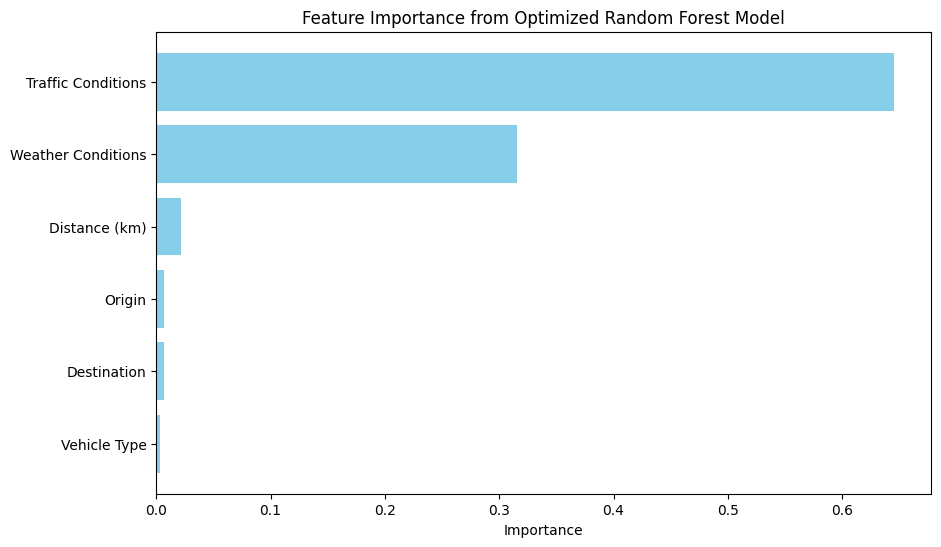

In [33]:
# Analyzing feature importance from the optimized Random Forest model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Getting feature importances
importances = optimized_random_forest_model.feature_importances_
features = X_train.columns

# Creating a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance from Optimized Random Forest Model')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()

The feature importance analysis has been completed, and the results have been visualized. The bar chart displays the importance of each feature in predicting shipment delays, allowing us to identify which factors are most influential.

In [34]:
import joblib

# Save the model
joblib.dump(random_forest_model, 'shipment_model.pkl')

['shipment_model.pkl']